# Search Report

In [1]:
# import sys
# import os

# submit_dir=os.environ['SLURM_SUBMIT_DIR']
# sys.path.append(submit_dir)

In [3]:
import matplotlib.pylab as plt
from IPython.display import display, Markdown, Latex


import re

import imageio
import numpy as np

import CocoRun
from see import Segmentors
from see import JupyterGUI

import inspect
import argparse

outputfolder = './'

images, masks, outputs = CocoRun.getCocoFolderLists(outputfolder)

In [4]:
#Fitness for all files
file = open(outputfolder+'params.txt','r')
fitness = []
filelines = file.readlines()
params = filelines[0]
for line in filelines[1:]:
    match = re.search(' ', line)
    fitness.append(float(line[:match.start()]))
print(params)

['CT', 7912, 0.981, 6522, 0.0, 3709, 3938, 10, 0.42, 2785, 3902, 2, 3, 0.01, 0.53, (1, 2), 4.6, 'small disk', 'checkerboard', 7, 9255, 48, 0.0, 0.0, 0.0]



In [5]:
seg = Segmentors.algoFromParams(eval(params))

code = "```python\n"
code += inspect.getsource(seg.evaluate)
code += "```\n"

display(Markdown(code))

```python
    def evaluate(self, img): #XX
        channel_num = self.params["seed"]
        if len(img.shape) > 2:
            num_channels = img.shape[2]
            if channel_num < num_channels:
                channel = img[:, :, channel_num]
            else:
                hsv = skimage.color.rgb2hsv(img)
                channel = hsv[:, :, channel_num-num_channels]
        else:
            channel = img
        pscale = np.max(channel)
        mx = self.params["sigma"] * pscale
        mn = self.params["mu"] * pscale
        if mx < mn:
            temp = mx
            mx = mn
            mn = temp

        output = np.ones(channel.shape)
        output[channel < mn] = 0
        output[channel > mx] = 0

        return output
```


In [6]:
fitness = np.array(fitness)
total = len(fitness)
sorted_fitness = fitness.copy()
sorted_fitness.sort()

fivehundred_err = len(fitness[fitness < 500]) / total * 100
print(f"This parameter got {fivehundred_err}% on all the Coco files\n")

This parameter got 68.33333333333333% on all the Coco files



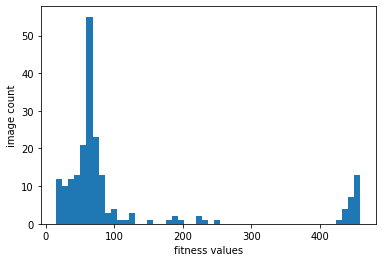

In [7]:
plt.hist(fitness[fitness < 500], 50);
plt.xlabel('fitness values')
plt.ylabel('image count');

In [8]:
###How fitness changes over time
file = open(f"{outputfolder}search.out","r") 
match = ''
tfitness = []
for line in file.readlines():
    if re.search('#BEST', line):
        match = re.search(" \- \[", line)
        tfitness.append(float(line[8:match.start()]))
file.close()

plt.plot(tfitness)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolution of the fitness');

FileNotFoundError: [Errno 2] No such file or directory: './search.out'

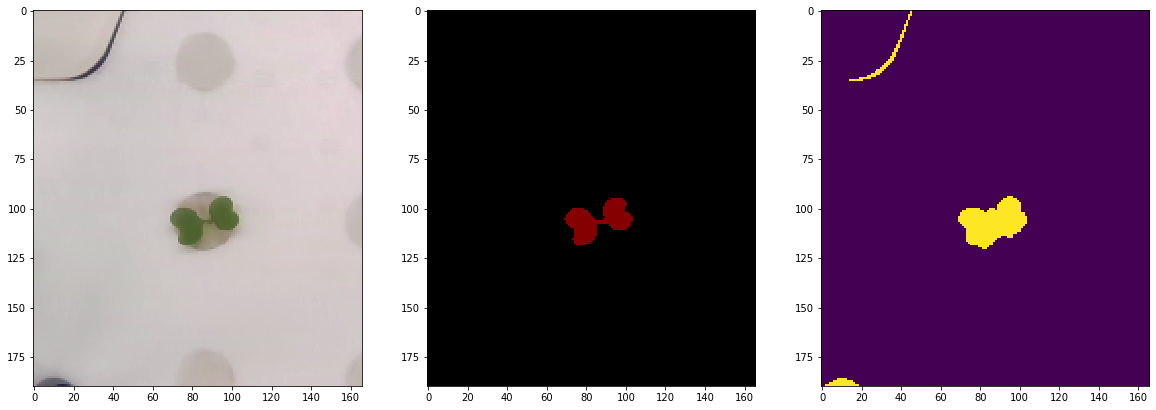

In [9]:
#for imagename, maskname, outputname in zip(images, masks, output):
index = 10

imagename = images[index]
maskname = masks[index]
outputname = outputs[index]

print("\n")

image = imageio.imread(imagename)
mask = imageio.imread(maskname)
output = imageio.imread(outputname)

JupyterGUI.showthree(image,mask,output)